# Insurance Claim Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Insurance_Fraud_Detection')

In [3]:
df

328  48  521585  17-10-2014  OH   250/500  1000  1406.91        0  \
0    228  42  342868  27-06-2006  IN   250/500  2000  1197.22  5000000   
1    134  29  687698  06-09-2000  OH   100/300  2000  1413.14  5000000   
2    256  41  227811  25-05-1990  IL   250/500  2000  1415.74  6000000   
3    228  44  367455  06-06-2014  IL  500/1000  1000  1583.91  6000000   
4    256  39  104594  12-10-2006  OH   250/500  1000  1351.10        0   
..   ...  ..     ...         ...  ..       ...   ...      ...      ...   
994    3  38  941851  16-07-1991  OH  500/1000  1000  1310.80        0   
995  285  41  186934  05-01-2014  IL   100/300  1000  1436.79        0   
996  130  34  918516  17-02-2003  OH   250/500   500  1383.49  3000000   
997  458  62  533940  18-11-2011  IL  500/1000  2000  1356.92  5000000   
998  456  60  556080  11-11-1996  OH   250/500  1000   766.19        0   

     466132  ...  2 YES.1   71610   6510  13020  52080        Saab      92x  \
0    468176  ...  0     ?    5070    780    780   3510    Mercedes     E400   
1    430632  ...  3    NO   34650   7700   3850  23100       Dodge      RAM   
2    608117  ...  2    NO   63400   6340   6340  50720   Chevrolet    Tahoe   
3    610706  ...  1    NO    6500   1300    650   4550      Accura      RSX   
4    478456  ...  2    NO   64100   6410   6410  51280        Saab       95   
..      ...  ... ..   ...     ...    ...    ...    ...         ...      ...   
994  431289  ...  1     ?   87200  17440   8720  61040       Honda   Accord   
995  608177  ...  3     ?  108480  18080  18080  72320  Volkswagen   Passat   
996  442797  ...  3   YES   67500   7500   7500  52500      Suburu  Impreza   
997  441714  ...  1   YES   46980   5220   5220  36540        Audi       A5   
998  612260  ...  3     ?    5060    460    920   3680    Mercedes     E400   

     2004  Y  
0    2007  Y  
1    2007  N  
2    2014  Y  
3    2009  N  
4    2003  Y  
..    ... ..  
994  2006  N  
995  2015  N  
996  1996  N  
997  1998  N  
998  2007  N  

[999 rows x 39 columns]

In [4]:
df.head(10)

328  48  521585  17-10-2014  OH   250/500  1000  1406.91        0  466132  \
0  228  42  342868  27-06-2006  IN   250/500  2000  1197.22  5000000  468176   
1  134  29  687698  06-09-2000  OH   100/300  2000  1413.14  5000000  430632   
2  256  41  227811  25-05-1990  IL   250/500  2000  1415.74  6000000  608117   
3  228  44  367455  06-06-2014  IL  500/1000  1000  1583.91  6000000  610706   
4  256  39  104594  12-10-2006  OH   250/500  1000  1351.10        0  478456   
5  137  34  413978  04-06-2000  IN   250/500  1000  1333.35        0  441716   
6  165  37  429027  03-02-1990  IL   100/300  1000  1137.03        0  603195   
7   27  33  485665  05-02-1997  IL   100/300   500  1442.99        0  601734   
8  212  42  636550  25-07-2011  IL   100/300   500  1315.68        0  600983   
9  235  42  543610  26-05-2002  OH   100/300   500  1253.12  4000000  462283   

   ...  2 YES.1  71610   6510  13020  52080       Saab         92x  2004  Y  
0  ...  0     ?   5070    780    780   3510   Mercedes        E400  2007  Y  
1  ...  3    NO  34650   7700   3850  23100      Dodge         RAM  2007  N  
2  ...  2    NO  63400   6340   6340  50720  Chevrolet       Tahoe  2014  Y  
3  ...  1    NO   6500   1300    650   4550     Accura         RSX  2009  N  
4  ...  2    NO  64100   6410   6410  51280       Saab          95  2003  Y  
5  ...  0     ?  78650  21450   7150  50050     Nissan  Pathfinder  2012  N  
6  ...  2   YES  51590   9380   9380  32830       Audi          A5  2015  N  
7  ...  1   YES  27700   2770   2770  22160     Toyota       Camry  2012  N  
8  ...  1     ?  42300   4700   4700  32900       Saab         92x  1996  N  
9  ...  2     ?  87010   7910  15820  63280       Ford        F150  2002  N  

[10 rows x 39 columns]

In [5]:
df.tail(10)

328  48  521585  17-10-2014  OH   250/500  1000  1406.91        0  \
989  286  43  663190  05-02-1994  IL   100/300   500  1564.43  3000000   
990  257  44  109392  12-07-2006  OH   100/300  1000  1280.88        0   
991   94  26  215278  24-10-2007  IN   100/300   500   722.66        0   
992  124  28  674570  08-12-2001  OH   250/500  1000  1235.14        0   
993  141  30  681486  24-03-2007  IN  500/1000  1000  1347.04        0   
994    3  38  941851  16-07-1991  OH  500/1000  1000  1310.80        0   
995  285  41  186934  05-01-2014  IL   100/300  1000  1436.79        0   
996  130  34  918516  17-02-2003  OH   250/500   500  1383.49  3000000   
997  458  62  533940  18-11-2011  IL  500/1000  2000  1356.92  5000000   
998  456  60  556080  11-11-1996  OH   250/500  1000   766.19        0   

     466132  ...  2 YES.1   71610   6510  13020  52080        Saab  \
989  477644  ...  2   YES   34290   3810   3810  26670        Jeep   
990  433981  ...  1    NO   46980      0   5220  41760      Accura   
991  433696  ...  2   YES   36700   3670   7340  25690      Nissan   
992  443567  ...  1     ?   60200   6020   6020  48160  Volkswagen   
993  430665  ...  2   YES    6480    540   1080   4860       Honda   
994  431289  ...  1     ?   87200  17440   8720  61040       Honda   
995  608177  ...  3     ?  108480  18080  18080  72320  Volkswagen   
996  442797  ...  3   YES   67500   7500   7500  52500      Suburu   
997  441714  ...  1   YES   46980   5220   5220  36540        Audi   
998  612260  ...  3     ?    5060    460    920   3680    Mercedes   

                92x  2004  Y  
989  Grand Cherokee  2013  N  
990              TL  2002  N  
991      Pathfinder  2010  N  
992          Passat  2012  N  
993           Civic  1996  N  
994          Accord  2006  N  
995          Passat  2015  N  
996         Impreza  1996  N  
997              A5  1998  N  
998            E400  2007  N  

[10 rows x 39 columns]

In [6]:
#First we rename the columns:
df.columns = ['months_as_customer', 'age', 'policy_number','policy_bind_date','policy_state','ploicy_csl','policy_deductable','policy_annual_premium','umbrella_limit','insured_zip','insured_sex','insured_education_level', 'insured_occupation', 'insured_hobbies','insured_relationship', 'capital_gains','capital_loss','incident_date','incident_type','collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', ' incident_city', 'incident_location', 'incident_hour_of_the_day','number_of_vechile_involved','property_damage','bodily_injuries','witnesses','policy_report_available','total_claim_amount', 'injury_claim','property_claim','vechile_claim', 'auto_make','auto_model','auto_year','fraud_reported']

In [7]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   228   42         342868       27-06-2006           IN   
1                   134   29         687698       06-09-2000           OH   
2                   256   41         227811       25-05-1990           IL   
3                   228   44         367455       06-06-2014           IL   
4                   256   39         104594       12-10-2006           OH   
..                  ...  ...            ...              ...          ...   
994                   3   38         941851       16-07-1991           OH   
995                 285   41         186934       05-01-2014           IL   
996                 130   34         918516       17-02-2003           OH   
997                 458   62         533940       18-11-2011           IL   
998                 456   60         556080       11-11-1996           OH   

    ploicy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               2000                1197.22         5000000   
1      100/300               2000                1413.14         5000000   
2      250/500               2000                1415.74         6000000   
3     500/1000               1000                1583.91         6000000   
4      250/500               1000                1351.10               0   
..         ...                ...                    ...             ...   
994   500/1000               1000                1310.80               0   
995    100/300               1000                1436.79               0   
996    250/500                500                1383.49         3000000   
997   500/1000               2000                1356.92         5000000   
998    250/500               1000                 766.19               0   

     insured_zip  ... witnesses policy_report_available total_claim_amount  \
0         468176  ...         0                       ?               5070   
1         430632  ...         3                      NO              34650   
2         608117  ...         2                      NO              63400   
3         610706  ...         1                      NO               6500   
4         478456  ...         2                      NO              64100   
..           ...  ...       ...                     ...                ...   
994       431289  ...         1                       ?              87200   
995       608177  ...         3                       ?             108480   
996       442797  ...         3                     YES              67500   
997       441714  ...         1                     YES              46980   
998       612260  ...         3                       ?               5060   

    injury_claim property_claim  vechile_claim   auto_make auto_model  \
0            780            780           3510    Mercedes       E400   
1           7700           3850          23100       Dodge        RAM   
2           6340           6340          50720   Chevrolet      Tahoe   
3           1300            650           4550      Accura        RSX   
4           6410           6410          51280        Saab         95   
..           ...            ...            ...         ...        ...   
994        17440           8720          61040       Honda     Accord   
995        18080          18080          72320  Volkswagen     Passat   
996         7500           7500          52500      Suburu    Impreza   
997         5220           5220          36540        Audi         A5   
998          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2007              Y  
1        2007              N  
2        2014              Y  
3        2009              N  
4        2003              Y  
..        ...            ...  
994      2006              N  
995      2015              N  
996      1996              N  
997      1998              N  
998      200

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   months_as_customer          999 non-null    int64  
 1   age                         999 non-null    int64  
 2   policy_number               999 non-null    int64  
 3   policy_bind_date            999 non-null    object 
 4   policy_state                999 non-null    object 
 5   ploicy_csl                  999 non-null    object 
 6   policy_deductable           999 non-null    int64  
 7   policy_annual_premium       999 non-null    float64
 8   umbrella_limit              999 non-null    int64  
 9   insured_zip                 999 non-null    int64  
 10  insured_sex                 999 non-null    object 
 11  insured_education_level     999 non-null    object 
 12  insured_occupation          999 non-null    object 
 13  insured_hobbies             999 non

No misssing values are present.

there is three type of data present i.e object , int64 and float64.

In [9]:
df.shape

(999, 39)

In [10]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'ploicy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital_gains', 'capital_loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', ' incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vechile_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'policy_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vechile_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [11]:
df.isnull().sum()

months_as_customer            0
age                           0
policy_number                 0
policy_bind_date              0
policy_state                  0
ploicy_csl                    0
policy_deductable             0
policy_annual_premium         0
umbrella_limit                0
insured_zip                   0
insured_sex                   0
insured_education_level       0
insured_occupation            0
insured_hobbies               0
insured_relationship          0
capital_gains                 0
capital_loss                  0
incident_date                 0
incident_type                 0
collision_type                0
incident_severity             0
authorities_contacted         0
incident_state                0
 incident_city                0
incident_location             0
incident_hour_of_the_day      0
number_of_vechile_involved    0
property_damage               0
bodily_injuries               0
witnesses                     0
policy_report_available       0
total_cl

In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Length: 999, dtype: bool

No duplicate values are present.

In [13]:
print(df.select_dtypes(include=['object']).nunique())

policy_bind_date           950
policy_state                 3
ploicy_csl                   3
insured_sex                  2
insured_education_level      7
insured_occupation          14
insured_hobbies             20
insured_relationship         6
incident_date               60
incident_type                4
collision_type               4
incident_severity            4
authorities_contacted        5
incident_state               7
 incident_city               7
incident_location          999
property_damage              3
policy_report_available      3
auto_make                   14
auto_model                  39
fraud_reported               2
dtype: int64


In [14]:
print(df.select_dtypes(include=['int64']).nunique())

months_as_customer            391
age                            46
policy_number                 999
policy_deductable               3
umbrella_limit                 11
insured_zip                   994
capital_gains                 338
capital_loss                  354
incident_hour_of_the_day       24
number_of_vechile_involved      4
bodily_injuries                 3
witnesses                       4
total_claim_amount            763
injury_claim                  638
property_claim                625
vechile_claim                 726
auto_year                      21
dtype: int64


In [15]:
print(df.select_dtypes(include=['float64']).nunique())

policy_annual_premium    990
dtype: int64


In [16]:
fraud_reported = df['fraud_reported'].value_counts()
fraud_reported

N    753
Y    246
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

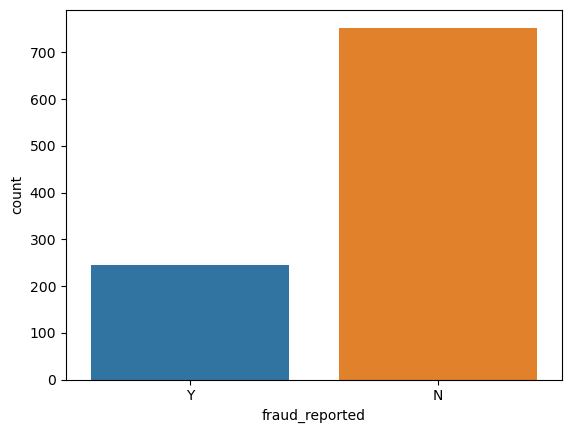

In [17]:
sns.countplot(df['fraud_reported'])

In [18]:
df.describe().T

count          mean           std         min  \
months_as_customer          999.0  2.038298e+02  1.151038e+02        0.00   
age                         999.0  3.893894e+01  9.140370e+00       19.00   
policy_number               999.0  5.462633e+05  2.571906e+05   100804.00   
policy_deductable           999.0  1.136136e+03  6.121560e+02      500.00   
policy_annual_premium       999.0  1.256255e+03  2.442432e+02      433.33   
umbrella_limit              999.0  1.102102e+06  2.298293e+06 -1000000.00   
insured_zip                 999.0  5.012496e+05  7.172892e+04   430104.00   
capital_gains               999.0  2.509790e+04  2.787187e+04        0.00   
capital_loss                999.0 -2.682052e+04  2.810537e+04  -111100.00   
incident_hour_of_the_day    999.0  1.165065e+01  6.951671e+00        0.00   
number_of_vechile_involved  999.0  1.839840e+00  1.019044e+00        1.00   
bodily_injuries             999.0  9.919920e-01  8.205379e-01        0.00   
witnesses                   999.0  1.486486e+00  1.111773e+00        0.00   
total_claim_amount          999.0  5.274307e+04  2.640801e+04      100.00   
injury_claim                999.0  7.434344e+03  4.883309e+03        0.00   
property_claim              999.0  7.393944e+03  4.823860e+03        0.00   
vechile_claim               999.0  3.791478e+04  1.889040e+04       70.00   
auto_year                   999.0  2.005104e+03  6.018773e+00     1995.00   

                                   25%        50%        75%          max  
months_as_customer             115.500     199.00     276.00       479.00  
age                             32.000      38.00      44.00        64.00  
policy_number               335913.500  533940.00  759459.50    999435.00  
policy_deductable              500.000    1000.00    2000.00      2000.00  
policy_annual_premium         1089.185    1257.04    1415.71      2047.59  
umbrella_limit                   0.000       0.00       0.00  10000000.00  
insured_zip                 448373.000  466498.00  603254.00    620962.00  
capital_gains                    0.000       0.00   51000.00    100500.00  
capital_loss                -51500.000  -24100.00       0.00         0.00  
incident_hour_of_the_day         6.000      12.00      17.00        23.00  
number_of_vechile_involved       1.000       1.00       3.00         4.00  
bodily_injuries                  0.000       1.00       2.00         2.00  
witnesses                        1.000       1.00       2.00         3.00  
total_claim_amount           41775.000   57970.00   70550.00    114920.00  
injury_claim                  4290.000    6780.00   11310.00     21450.00  
property_claim                4440.000    6750.00   10870.00     23670.00  
vechile_claim                30275.000   42080.00   50775.00     79560.00  
auto_year                     2000.000    2005.00    2010.00      2015.00

In [19]:
dfcor = df.corr()
dfcor

months_as_customer       age  policy_number  \
months_as_customer                    1.000000  0.922018       0.057692   
age                                   0.922018  1.000000       0.059538   
policy_number                         0.057692  0.059538       1.000000   
policy_deductable                     0.027064  0.029423      -0.006759   
policy_annual_premium                 0.004355  0.013801       0.022629   
umbrella_limit                        0.016027  0.018613       0.008923   
insured_zip                           0.018436  0.026106       0.007037   
capital_gains                         0.005314 -0.008086       0.009905   
capital_loss                          0.019200  0.006428      -0.005580   
incident_hour_of_the_day              0.071746  0.088194       0.000021   
number_of_vechile_involved            0.015639  0.022938       0.013357   
bodily_injuries                      -0.010178 -0.015696      -0.004558   
witnesses                             0.057924  0.051932      -0.012618   
total_claim_amount                    0.061389  0.069206      -0.017946   
injury_claim                          0.065572  0.075749      -0.008780   
property_claim                        0.033725  0.059812      -0.010573   
vechile_claim                         0.060256  0.061892      -0.020117   
auto_year                            -0.000094  0.001536      -0.000201   

                            policy_deductable  policy_annual_premium  \
months_as_customer                   0.027064               0.004355   
age                                  0.029423               0.013801   
policy_number                       -0.006759               0.022629   
policy_deductable                    1.000000              -0.003109   
policy_annual_premium               -0.003109               1.000000   
umbrella_limit                       0.010764              -0.005953   
insured_zip                          0.004437               0.032666   
capital_gains                        0.035456              -0.014373   
capital_loss                        -0.023343               0.022973   
incident_hour_of_the_day             0.060752              -0.000989   
number_of_vechile_involved           0.051050              -0.045507   
bodily_injuries                     -0.022763               0.026779   
witnesses                            0.066750               0.002047   
total_claim_amount                   0.023005               0.008657   
injury_claim                         0.039066              -0.017519   
property_claim                       0.065097              -0.012384   
vechile_claim                        0.005438               0.019793   
auto_year                            0.026065              -0.049123   

                            umbrella_limit  insured_zip  capital_gains  \
months_as_customer                0.016027     0.018436       0.005314   
age                               0.018613     0.026106      -0.008086   
policy_number                     0.008923     0.007037       0.009905   
policy_deductable                 0.010764     0.004437       0.035456   
policy_annual_premium            -0.005953     0.032666      -0.014373   
umbrella_limit                    1.000000     0.019441      -0.046812   
insured_zip                       0.019441     1.000000       0.006803   
capital_gains                    -0.046812     0.006803       1.000000   
capital_loss                     -0.023611     0.049868      -0.047916   
incident_hour_of_the_day         -0.023729     0.007810      -0.015453   
number_of_vechile_involved       -0.021675     0.027057       0.062530   
bodily_injuries                   0.022750     0.028704       0.055848   
witnesses                        -0.006518     0.020036      -0.018130   
total_claim_amount               -0.040016    -0.033536       0.015269   
injury_claim                     -0.045509    -0.017590       0.026139   
property_claim                   -0.023249    -0.

<AxesSubplot:>

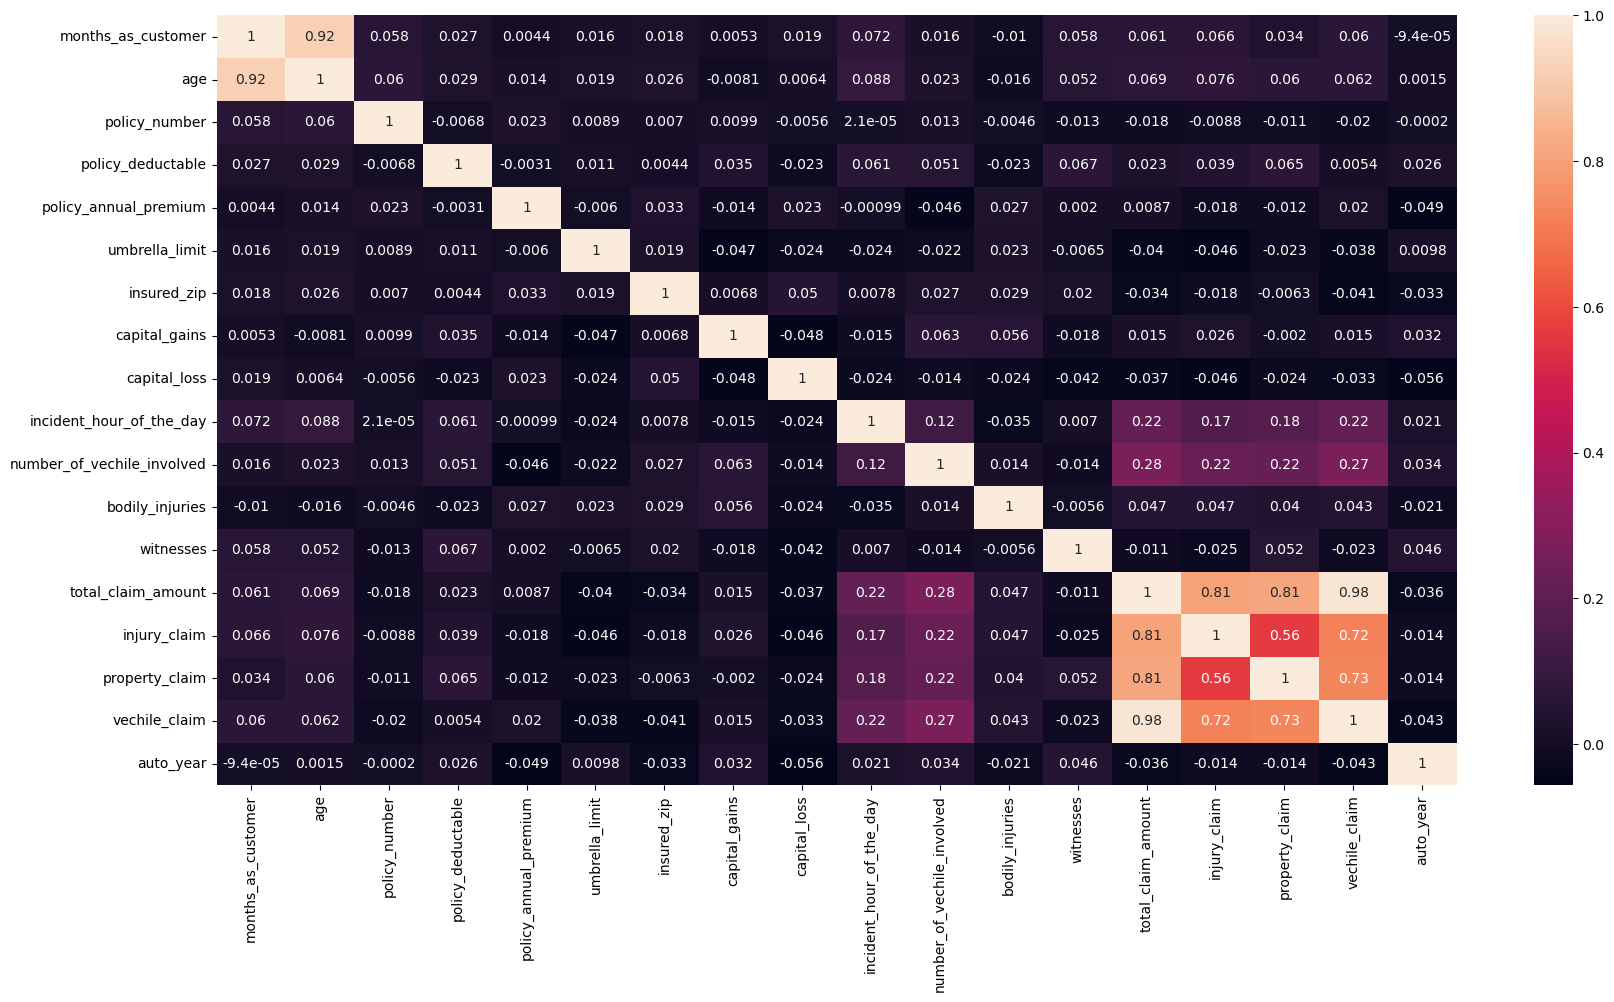

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap((dfcor),  annot= True)

Here we can see that there is positively correlation between total_claim_amount and vechile_claim , total_claim_amount and injury _claim. 

<AxesSubplot:>

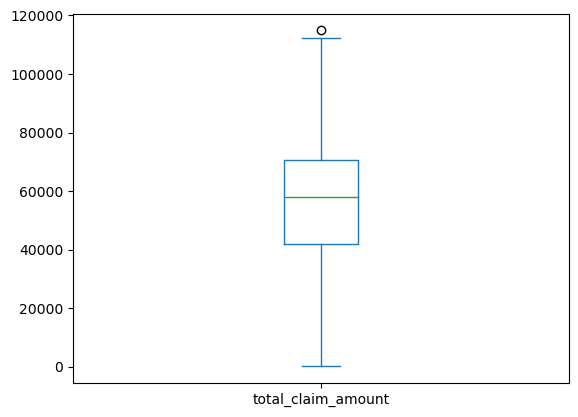

In [21]:
#Now check outliers
df['total_claim_amount'].plot.box()

In [22]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'ploicy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital_gains', 'capital_loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', ' incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vechile_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'policy_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vechile_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

<AxesSubplot:>

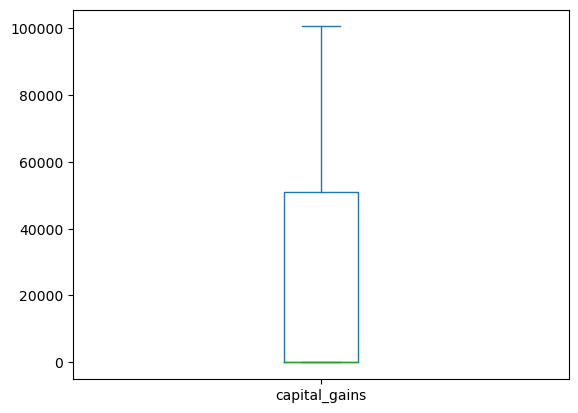

In [23]:
df['capital_gains'].plot.box()

months_as_customer               AxesSubplot(0.125,0.653529;0.0824468x0.226471)
age                           AxesSubplot(0.223936,0.653529;0.0824468x0.226471)
policy_number                 AxesSubplot(0.322872,0.653529;0.0824468x0.226471)
policy_deductable             AxesSubplot(0.421809,0.653529;0.0824468x0.226471)
policy_annual_premium         AxesSubplot(0.520745,0.653529;0.0824468x0.226471)
umbrella_limit                AxesSubplot(0.619681,0.653529;0.0824468x0.226471)
insured_zip                   AxesSubplot(0.718617,0.653529;0.0824468x0.226471)
capital_gains                 AxesSubplot(0.817553,0.653529;0.0824468x0.226471)
capital_loss                     AxesSubplot(0.125,0.381765;0.0824468x0.226471)
incident_hour_of_the_day      AxesSubplot(0.223936,0.381765;0.0824468x0.226471)
number_of_vechile_involved    AxesSubplot(0.322872,0.381765;0.0824468x0.226471)
bodily_injuries               AxesSubplot(0.421809,0.381765;0.0824468x0.226471)
witnesses                     AxesSubplo

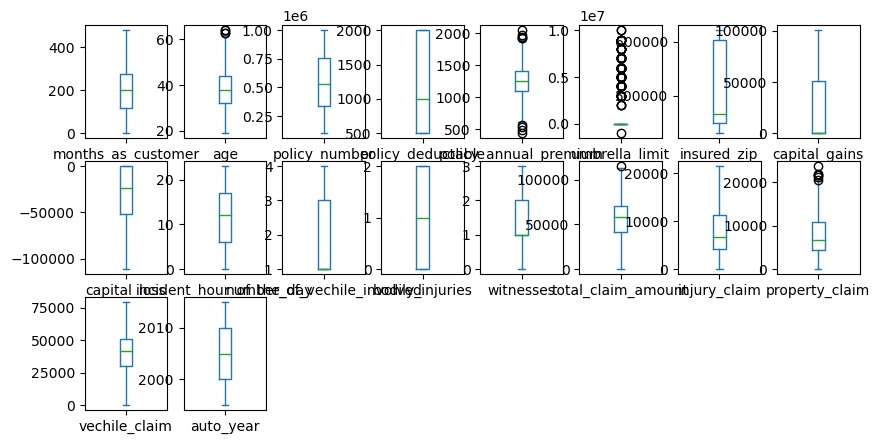

In [24]:
df.plot(kind='box',subplots=True,layout=(3,8),figsize=(10,5))

Here we can see that very less outliers are present in it. So we dont need to remove those outliers.

<Figure size 1000x1000 with 0 Axes>

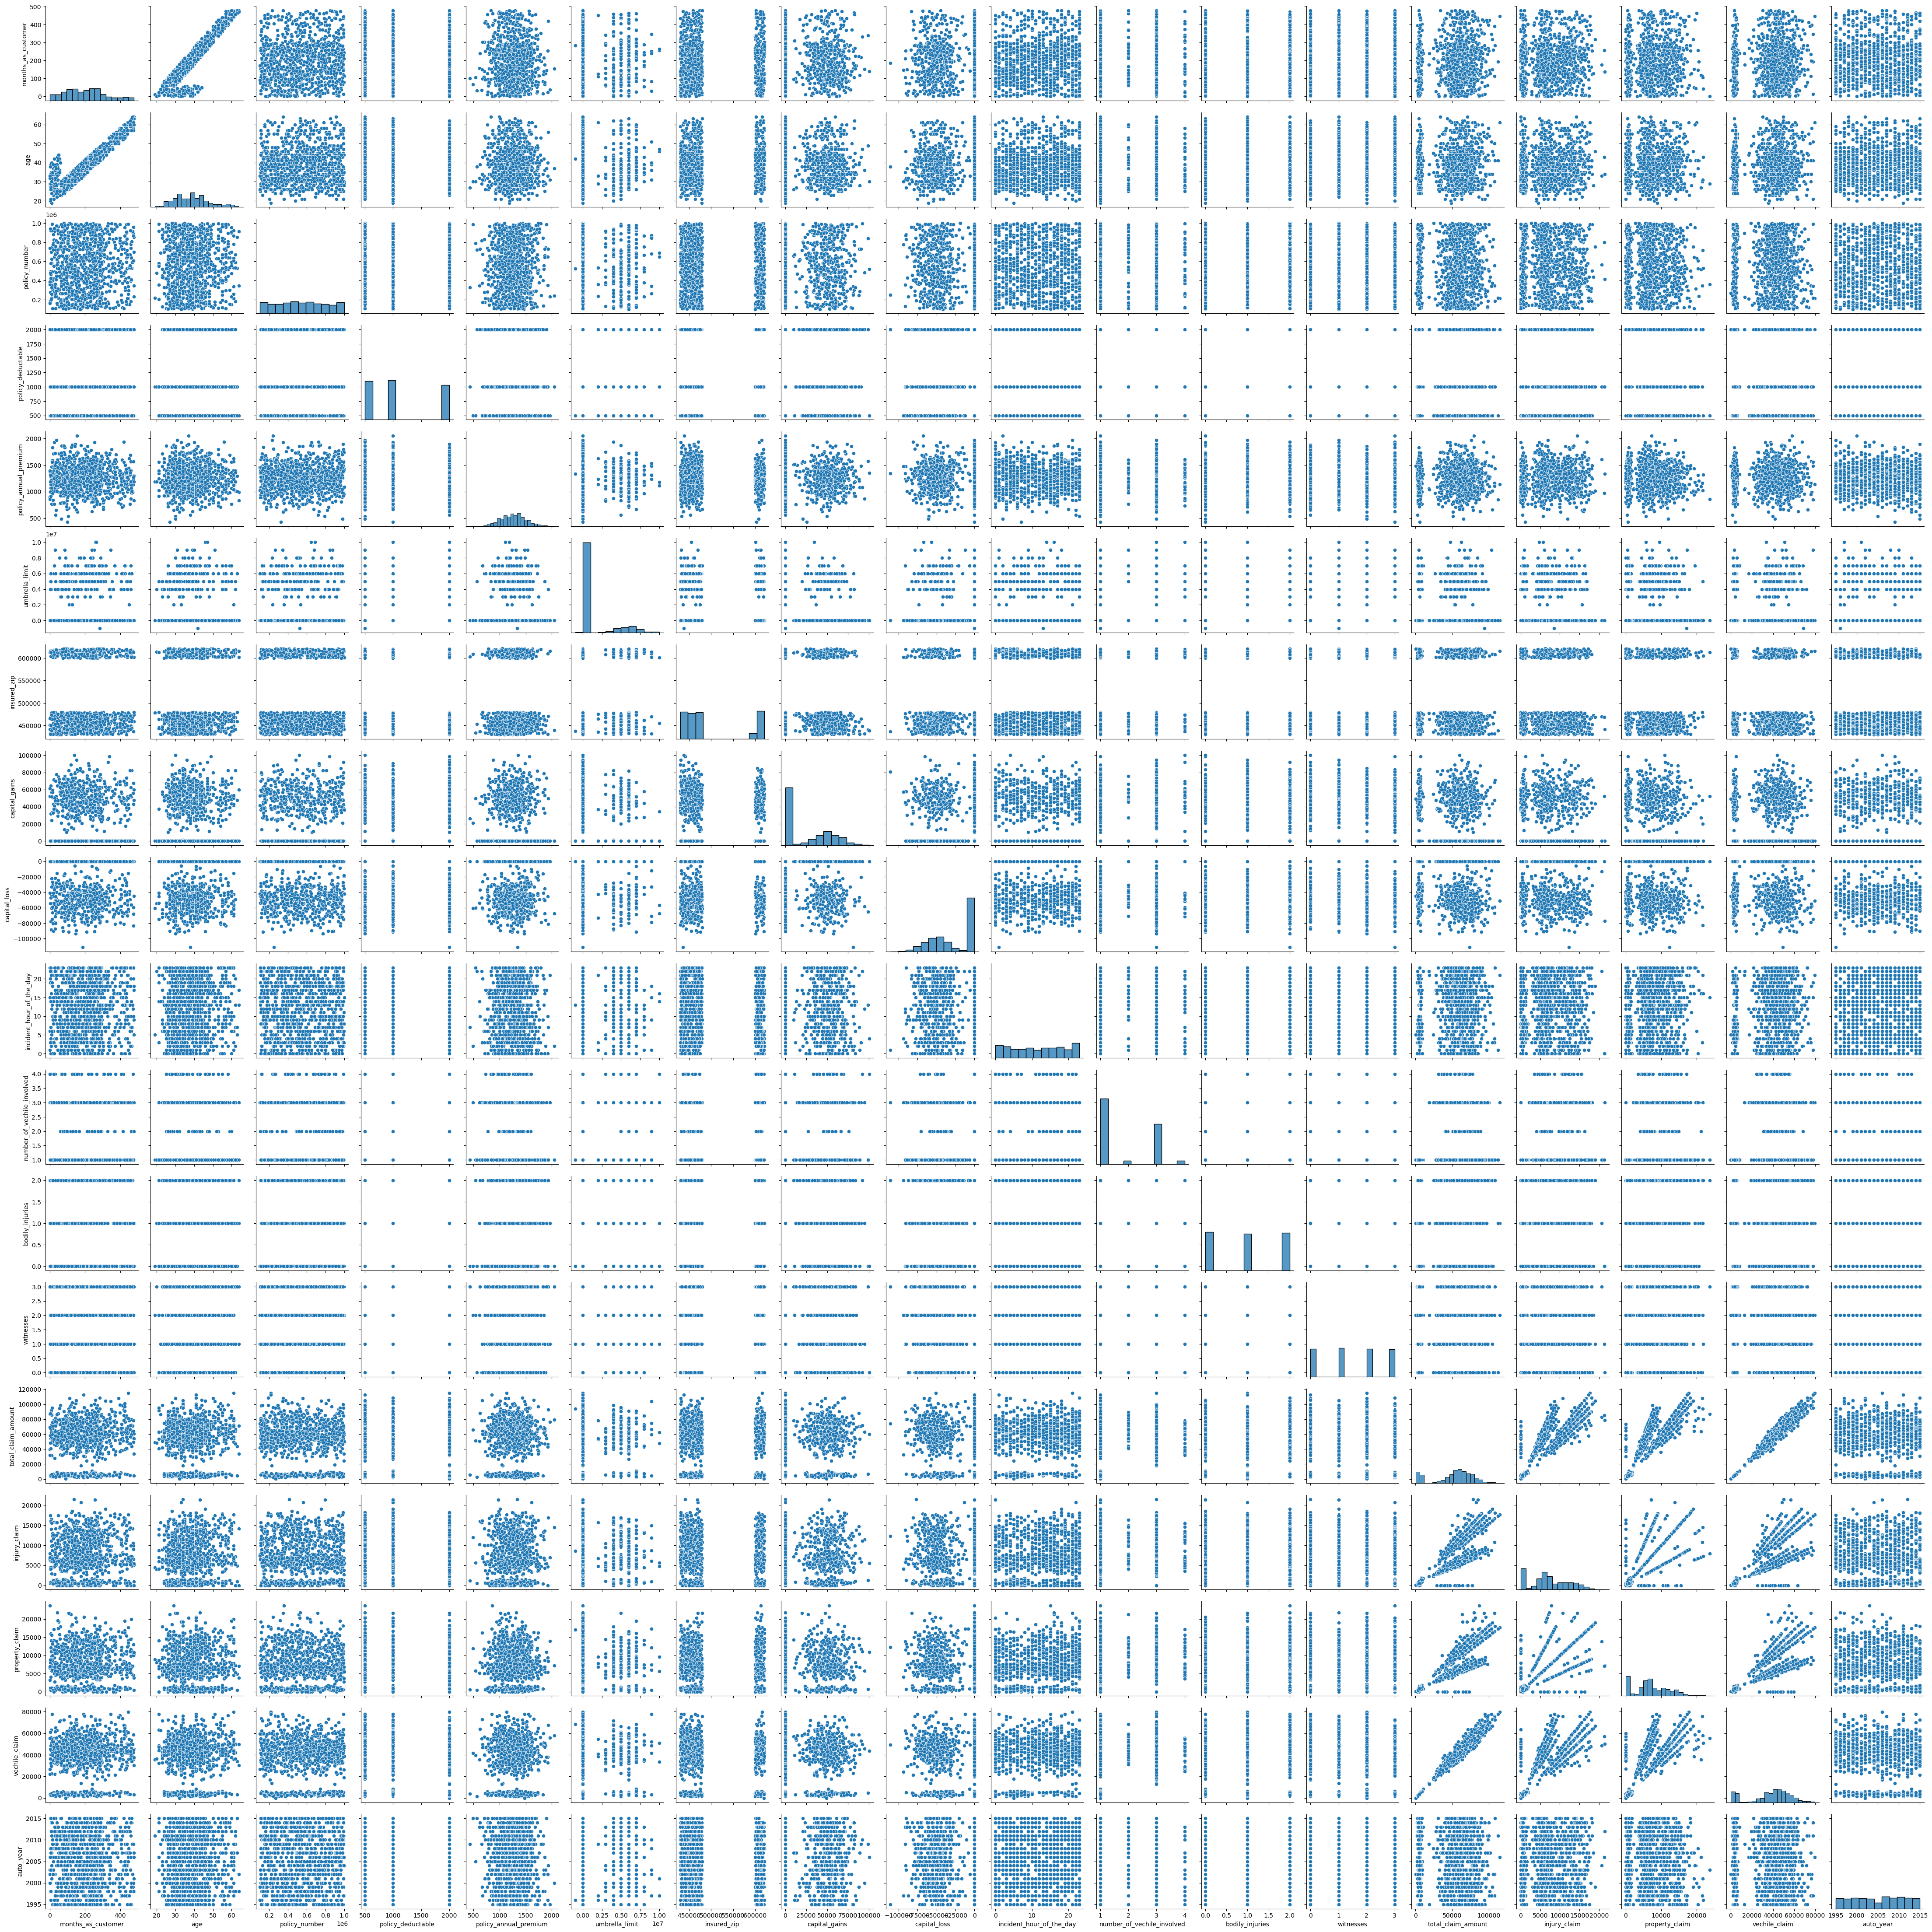

In [25]:
#Checking Skewness:
plt.figure(figsize=(10,10))
sns.pairplot(df)

In [26]:
fraud = df['fraud_reported'].value_counts()
label_fraud = fraud.index
size_fraud = fraud.values

In [27]:
label_fraud

Index(['N', 'Y'], dtype='object')

In [28]:
size_fraud

array([753, 246], dtype=int64)

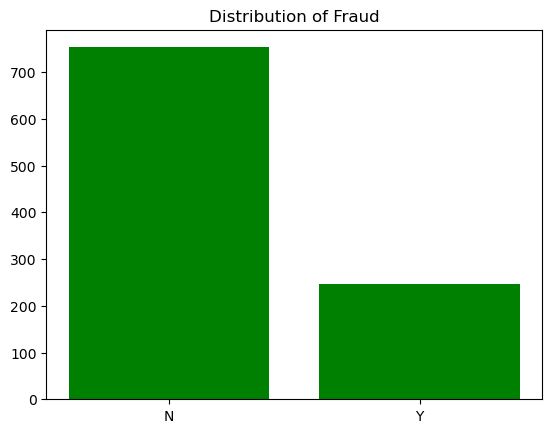

In [29]:
plt.bar(label_fraud ,size_fraud , color='g')
plt.title('Distribution of Fraud')
plt.show()

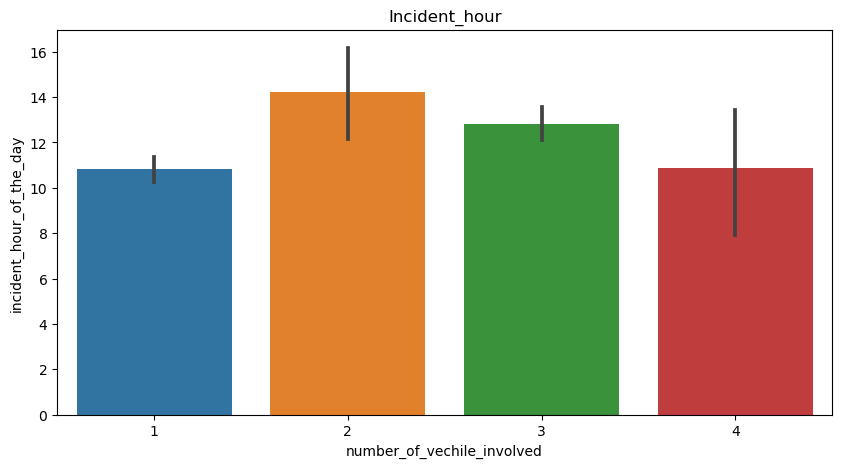

In [30]:
plt.figure(figsize = (10,5))
sns.barplot(y='incident_hour_of_the_day', x = 'number_of_vechile_involved', data = df)
plt.title('Incident_hour')
plt.show()

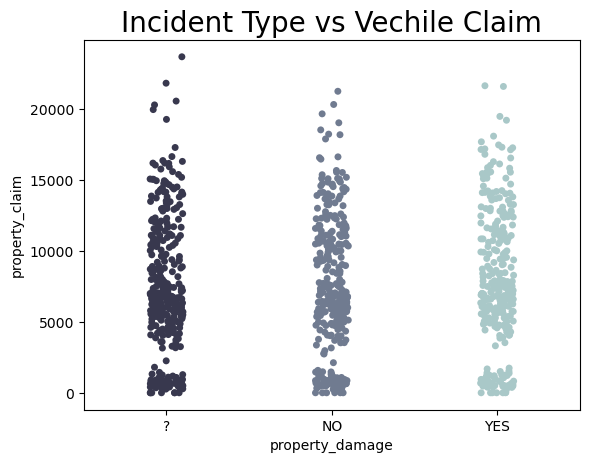

In [31]:
sns.stripplot(df['property_damage'], df['property_claim'], palette = 'bone')
plt.title('Incident Type vs Vechile Claim',fontsize = 20)
plt.show()

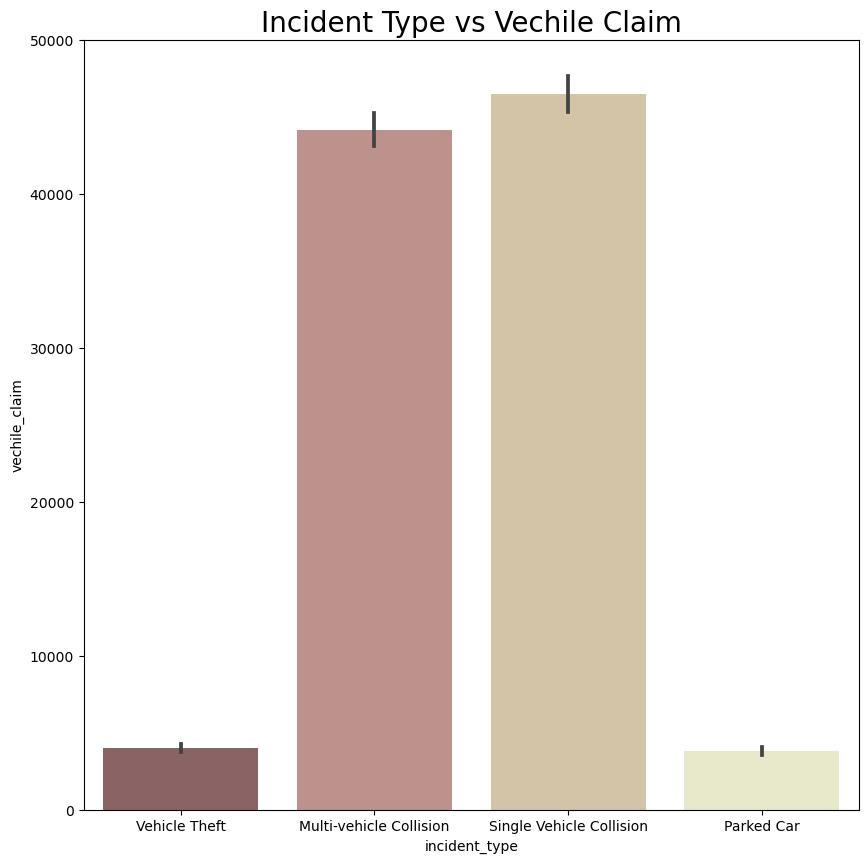

In [32]:
plt.figure(figsize=(10,10))
sns.barplot(df['incident_type'], df['vechile_claim'], palette = 'pink')
plt.title('Incident Type vs Vechile Claim', fontsize = 20)
plt.show()

In [33]:
incident=pd.crosstab(df[' incident_city'], df['incident_type'])


In [34]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'ploicy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital_gains', 'capital_loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', ' incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vechile_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'policy_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vechile_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

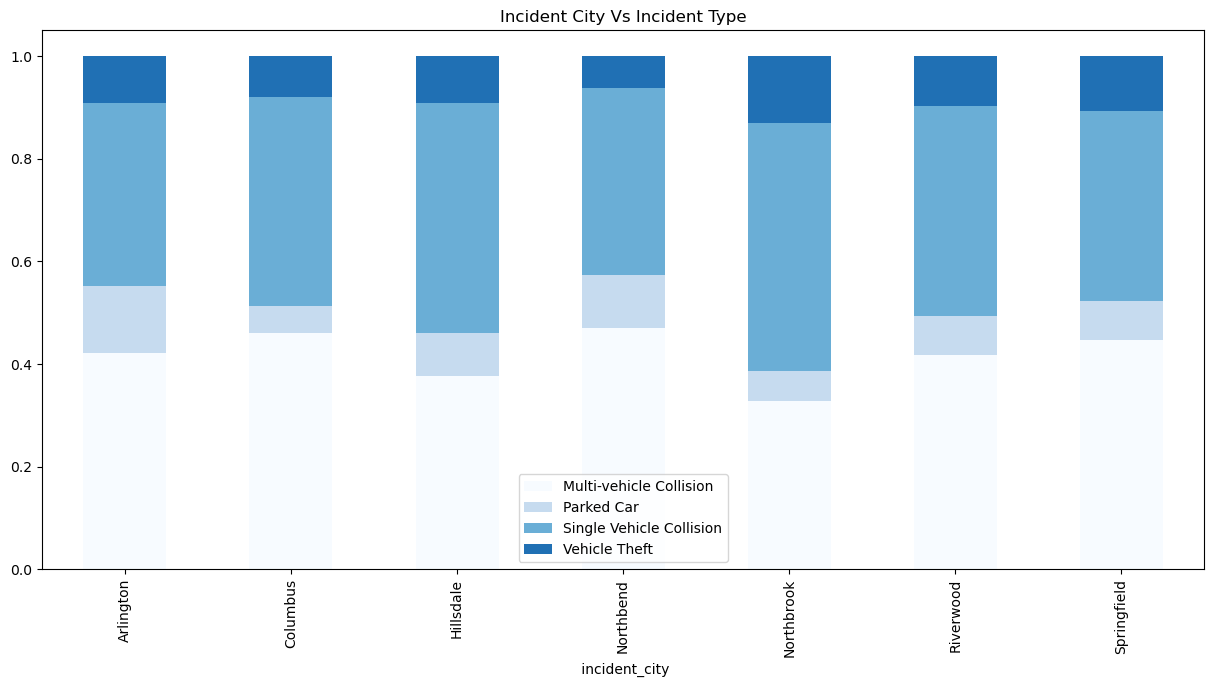

In [35]:
colors = plt.cm.Blues(np.linspace(0,1,5))
incident.div(incident.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = True, figsize=(15,7), color = colors)
plt.title('Incident City Vs Incident Type')
plt.legend()
plt.show()

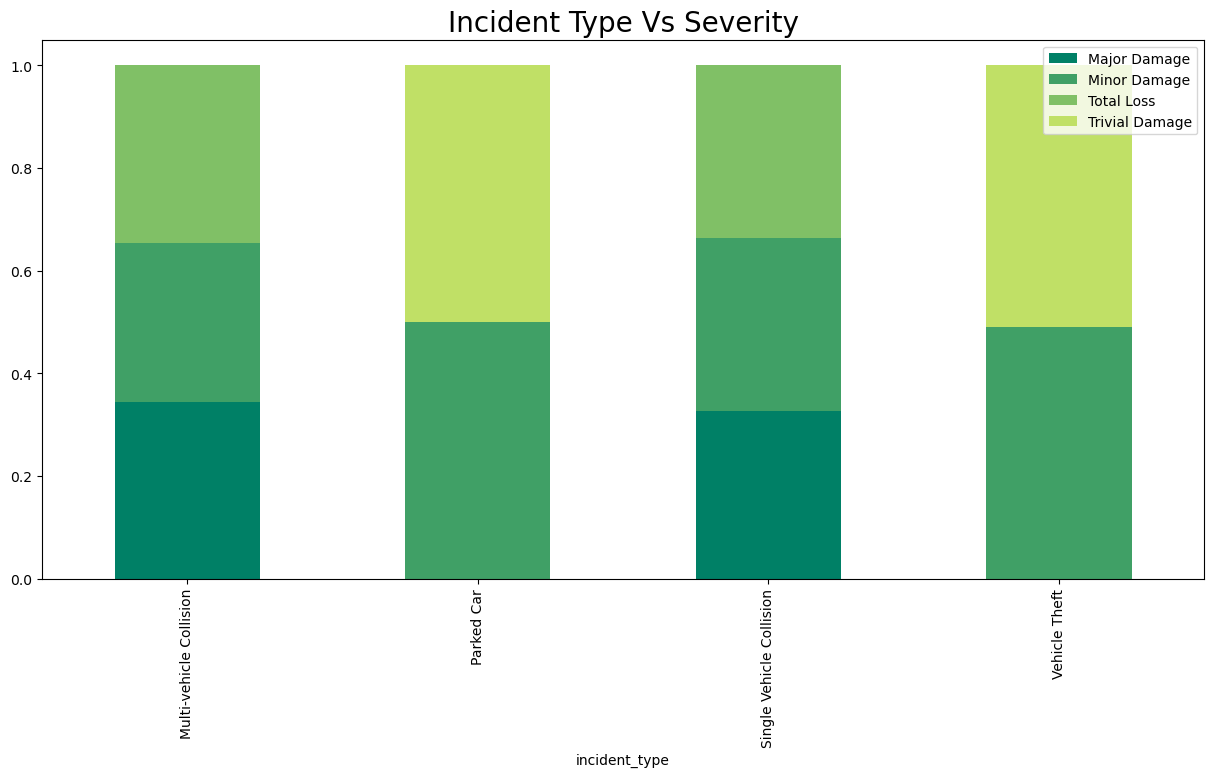

In [36]:
incident = pd.crosstab(df['incident_type'], df['incident_severity'])
colors = plt.cm.summer(np.linspace(0,1,5))
incident.div(incident.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True, figsize=(15,7), color = colors)
plt.title('Incident Type Vs Severity', fontsize=20)
plt.legend()
plt.show()

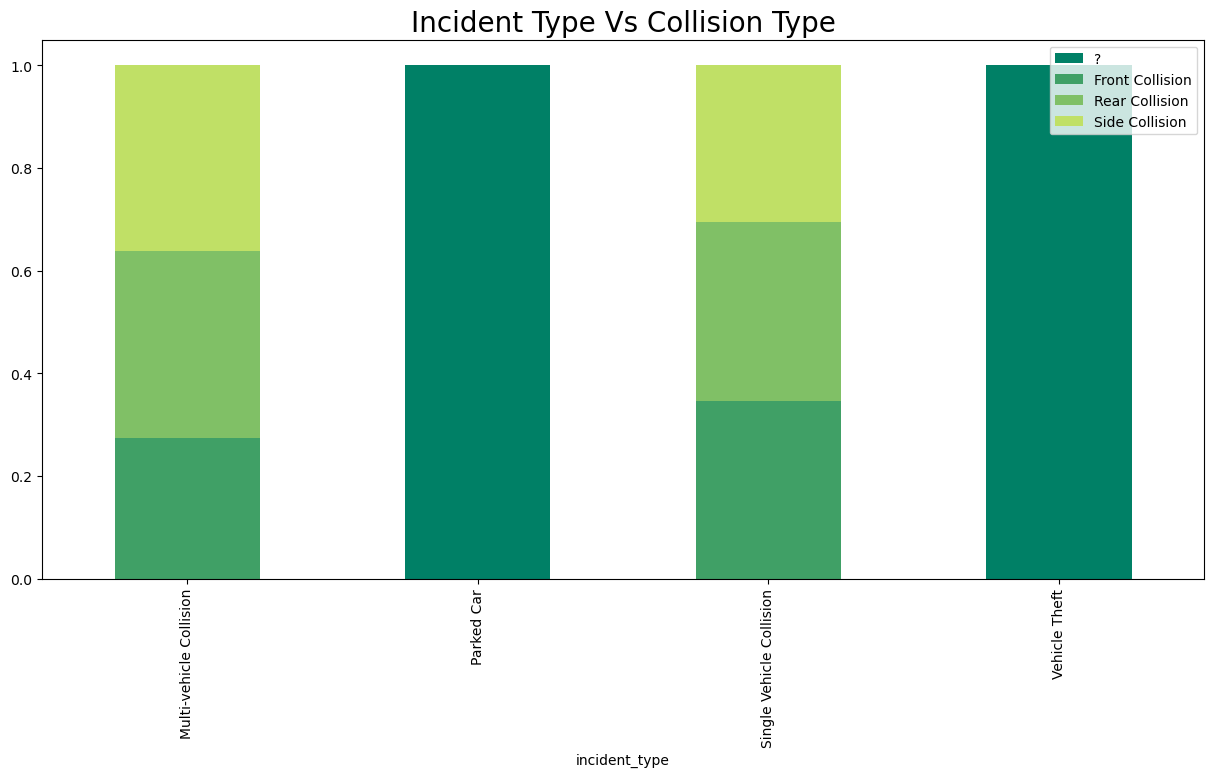

In [37]:
incident = pd.crosstab(df['incident_type'], df['collision_type'])
colors = plt.cm.summer(np.linspace(0,1,5))
incident.div(incident.sum(1).astype(float), axis=0).plot(kind='bar', stacked = True, figsize=(15,7), color = colors)
plt.title('Incident Type Vs Collision Type', fontsize=20)
plt.legend()
plt.show()

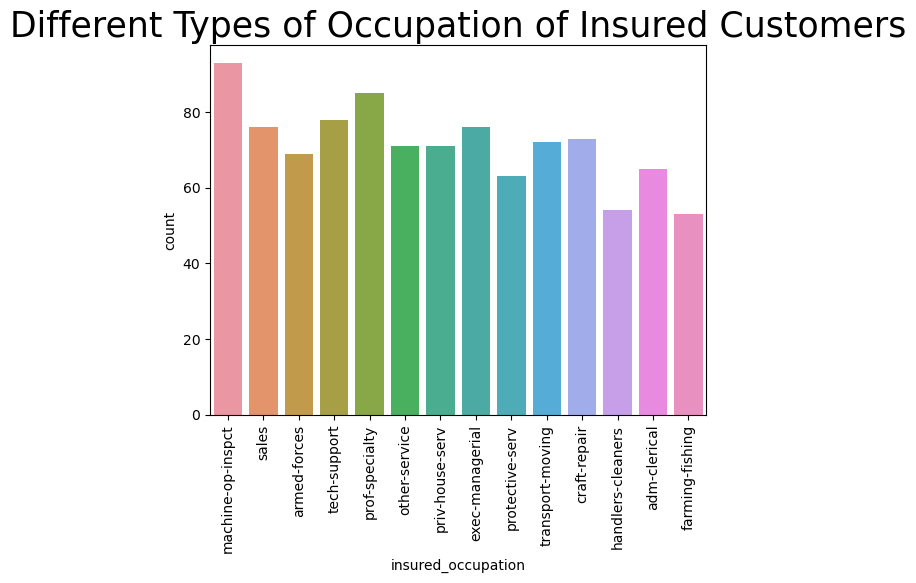

In [38]:
sns.countplot(df['insured_occupation'])
plt.title('Different Types of Occupation of Insured Customers', fontsize= 25)
plt.xticks(rotation=90)
plt.show()

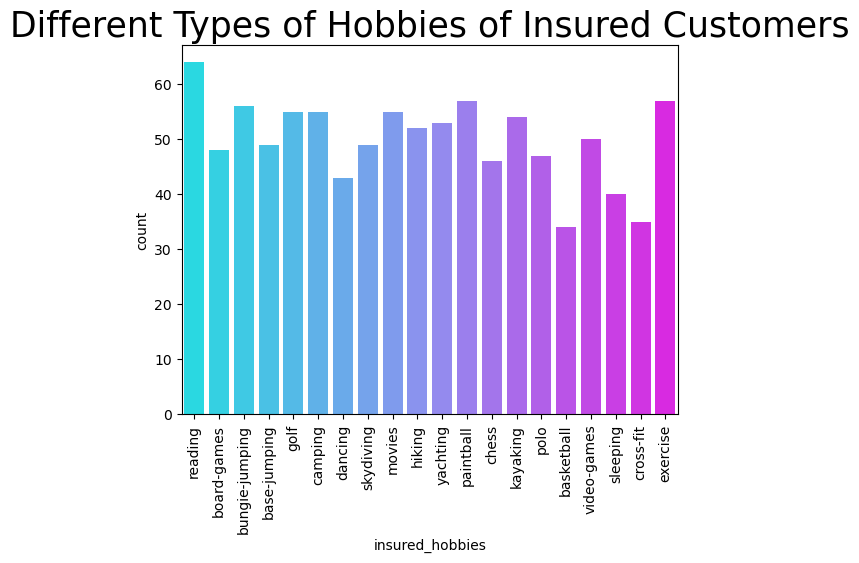

In [39]:
sns.countplot(df['insured_hobbies'], palette = 'cool')
plt.title('Different Types of Hobbies of Insured Customers', fontsize= 25)
plt.xticks(rotation=90)
plt.show()

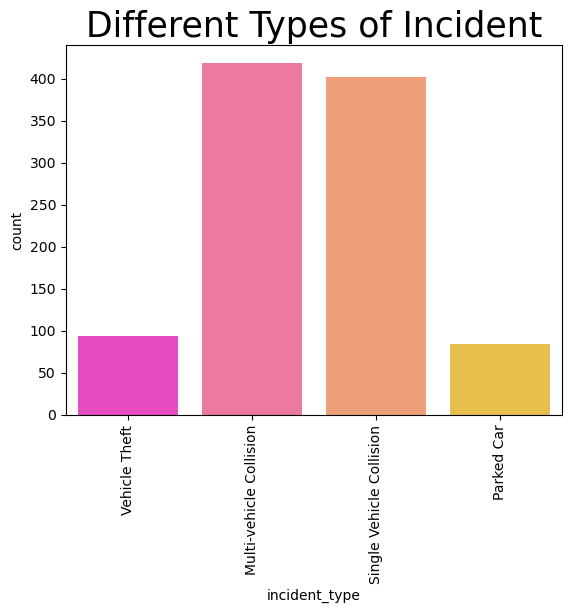

In [40]:
sns.countplot(df['incident_type'], palette= 'spring')
plt.title('Different Types of Incident', fontsize= 25)
plt.xticks(rotation=90)
plt.show()

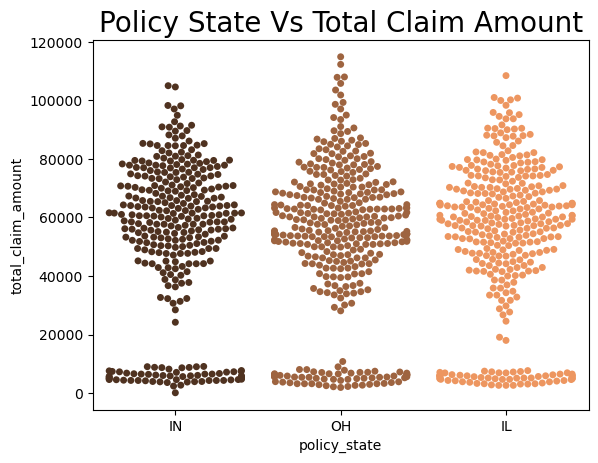

In [41]:
sns.swarmplot(df['policy_state'], df['total_claim_amount'],palette = 'copper')
plt.title('Policy State Vs Total Claim Amount', fontsize=20)
plt.show()

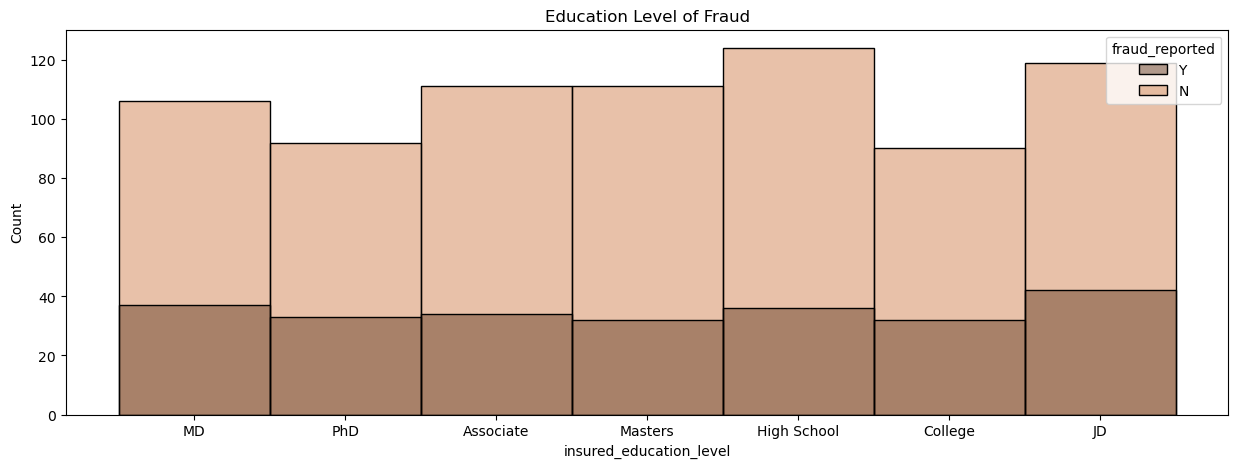

In [42]:
plt.figure(figsize = (15,5))
sns.histplot(data = df , x='insured_education_level', hue = 'fraud_reported', palette = 'copper')
plt.title('Education Level of Fraud')

plt.show()

In [43]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], errors = 'coerce')

In [44]:
df['policy_bind_date']

0     2006-06-27
1     2000-06-09
2     1990-05-25
3     2014-06-06
4     2006-12-10
         ...    
994   1991-07-16
995   2014-05-01
996   2003-02-17
997   2011-11-18
998   1996-11-11
Name: policy_bind_date, Length: 999, dtype: datetime64[ns]

In [45]:
df['fraud_reported'] = df['fraud_reported'].replace(('Y','N'),(0,1))


In [46]:
df['fraud_reported']

0      0
1      1
2      0
3      1
4      0
      ..
994    1
995    1
996    1
997    1
998    1
Name: fraud_reported, Length: 999, dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
encoder = LabelEncoder()

In [49]:
df['auto_model'] = encoder.fit_transform(df['auto_model'])
df['fraud_reported'] = encoder.fit_transform(df['fraud_reported'])


In [50]:
df.head(5)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 228   42         342868       2006-06-27           IN   
1                 134   29         687698       2000-06-09           OH   
2                 256   41         227811       1990-05-25           IL   
3                 228   44         367455       2014-06-06           IL   
4                 256   39         104594       2006-12-10           OH   

  ploicy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               2000                1197.22         5000000   
1    100/300               2000                1413.14         5000000   
2    250/500               2000                1415.74         6000000   
3   500/1000               1000                1583.91         6000000   
4    250/500               1000                1351.10               0   

   insured_zip  ... witnesses policy_report_available total_claim_amount  \
0       468176  ...         0                       ?               5070   
1       430632  ...         3                      NO              34650   
2       608117  ...         2                      NO              63400   
3       610706  ...         1                      NO               6500   
4       478456  ...         2                      NO              64100   

  injury_claim property_claim  vechile_claim  auto_make auto_model auto_year  \
0          780            780           3510   Mercedes         12      2007   
1         7700           3850          23100      Dodge         30      2007   
2         6340           6340          50720  Chevrolet         34      2014   
3         1300            650           4550     Accura         31      2009   
4         6410           6410          51280       Saab          3      2003   

  fraud_reported  
0              0  
1              1  
2              0  
3              1  
4              0  

[5 rows x 39 columns]

In [51]:
df['auto_make'] = encoder.fit_transform(df['auto_make'])
df['policy_report_available'] = encoder.fit_transform(df['policy_report_available'])
df['property_damage'] = encoder.fit_transform(df['property_damage'])
df[' incident_city'] = encoder.fit_transform(df[' incident_city'])
df['incident_state'] = encoder.fit_transform(df['incident_state'])
df['authorities_contacted'] = encoder.fit_transform(df['authorities_contacted'])
df['incident_severity']=encoder.fit_transform(df['incident_severity'])
df['incident_type'] = encoder.fit_transform(df['incident_type'])
df['collision_type'] = encoder.fit_transform(df['collision_type'])




In [52]:
df['incident_date'] = pd.to_datetime(df['incident_date'], errors = 'coerce')
df['incident_month'] = df['incident_date'].dt.month
df['incident_day'] = df['incident_date'].dt.day

In [53]:
df['insured_relationship'] = encoder.fit(df['insured_relationship'])
df['insured_hobbies'] = encoder.fit_transform(df['insured_hobbies'])
df['insured_occupation'] = encoder.fit_transform(df['insured_occupation'])
df['insured_education_level'] = encoder.fit_transform(df['insured_education_level'])
df['insured_sex'] = encoder.fit_transform(df['insured_sex'])
df['ploicy_csl'] = encoder.fit_transform(df['ploicy_csl'])
df['policy_state'] = encoder.fit_transform(df['policy_state'])






In [54]:
df = df.drop(['policy_number', 'policy_bind_date', 'incident_date','incident_location', 'auto_model'], axis=1)

In [55]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'ploicy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital_gains', 'capital_loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       ' incident_city', 'incident_hour_of_the_day',
       'number_of_vechile_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'policy_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vechile_claim', 'auto_make',
       'auto_year', 'fraud_reported', 'incident_month', 'incident_day'],
      dtype='object')

In [56]:
df.shape

(999, 36)

In [76]:
df.head(10).T

0               1               2  \
months_as_customer                     228             134             256   
age                                     42              29              41   
policy_state                             1               2               0   
ploicy_csl                               1               0               1   
policy_deductable                     2000            2000            2000   
policy_annual_premium              1197.22         1413.14         1415.74   
umbrella_limit                     5000000         5000000         6000000   
insured_zip                         468176          430632          608117   
insured_sex                              1               0               0   
insured_education_level                  4               6               6   
insured_occupation                       6              11               1   
insured_hobbies                         15               2               2   
insured_relationship        LabelEncoder()  LabelEncoder()  LabelEncoder()   
capital_gains                            0           35100           48900   
capital_loss                             0               0          -62400   
incident_type                            3               0               2   
collision_type                           0               2               1   
incident_severity                        1               1               0   
authorities_contacted                    4               4               4   
incident_state                           5               1               2   
 incident_city                           5               1               0   
incident_hour_of_the_day                 8               7               5   
number_of_vechile_involved               1               3               1   
property_damage                          0               1               0   
bodily_injuries                          0               2               1   
witnesses                                0               3               2   
policy_report_available                  0               1               1   
total_claim_amount                    5070           34650           63400   
injury_claim                           780            7700            6340   
property_claim                         780            3850            6340   
vechile_claim                         3510           23100           50720   
auto_make                                8               4               3   
auto_year                             2007            2007            2014   
fraud_reported                           0               1               0   
incident_month                           1               2              10   
incident_day                            21              22               1   

                                         3               4               5  \
months_as_customer                     228             256             137   
age                                     44              39              34   
policy_state                             0               2               1   
ploicy_csl                               2               1               1   
policy_deductable                     1000            1000            1000   
policy_annual_premium              1583.91          1351.1         1333.35   
umbrella_limit                     6000000               0               0   
insured_zip                         610706          478456          441716   
insured_sex                              1               0               1   
insured_education_level                  0               6               6   
insured_occupation                      11              12               9   
insured_hobbies                          2               3               2   
insured_relationship        LabelEncoder()  LabelEncoder()  LabelEncoder()   
capital_gains                        66000               0    

In [77]:
df.shape

(999, 36)

In [60]:
#Store the data in X and Y variable
X = df.drop(['fraud_reported'], axis=1)
y= df['fraud_reported']


In [61]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
                    #print(dataset[colname])
    return dataset
xnew=correlation(X,0.9)
xnew.head()

months_as_customer  policy_state  ploicy_csl  policy_deductable  \
0                 228             1           1               2000   
1                 134             2           0               2000   
2                 256             0           1               2000   
3                 228             0           2               1000   
4                 256             2           1               1000   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                1197.22         5000000       468176            1   
1                1413.14         5000000       430632            0   
2                1415.74         6000000       608117            0   
3                1583.91         6000000       610706            1   
4                1351.10               0       478456            0   

   insured_education_level  insured_occupation  ...  bodily_injuries  \
0                        4                   6  ...                0   
1                        6                  11  ...                2   
2                        6                   1  ...                1   
3                        0                  11  ...                0   
4                        6                  12  ...                0   

  witnesses  policy_report_available  total_claim_amount  injury_claim  \
0         0                        0                5070           780   
1         3                        1               34650          7700   
2         2                        1               63400          6340   
3         1                        1                6500          1300   
4         2                        1               64100          6410   

   property_claim  auto_make  auto_year  incident_month  incident_day  
0             780          8       2007               1            21  
1            3850          4       2007               2            22  
2            6340          3       2014              10             1  
3             650          0       2009               2            17  
4            6410         10       2003               2             1  

[5 rows x 33 columns]

In [62]:
df.head(3).T

0               1               2
months_as_customer                     228             134             256
age                                     42              29              41
policy_state                             1               2               0
ploicy_csl                               1               0               1
policy_deductable                     2000            2000            2000
policy_annual_premium              1197.22         1413.14         1415.74
umbrella_limit                     5000000         5000000         6000000
insured_zip                         468176          430632          608117
insured_sex                              1               0               0
insured_education_level                  4               6               6
insured_occupation                       6              11               1
insured_hobbies                         15               2               2
insured_relationship        LabelEncoder()  LabelEncoder()  LabelEncoder()
capital_gains                            0           35100           48900
capital_loss                             0               0          -62400
incident_type                            3               0               2
collision_type                           0               2               1
incident_severity                        1               1               0
authorities_contacted                    4               4               4
incident_state                           5               1               2
 incident_city                           5               1               0
incident_hour_of_the_day                 8               7               5
number_of_vechile_involved               1               3               1
property_damage                          0               1               0
bodily_injuries                          0               2               1
witnesses                                0               3               2
policy_report_available                  0               1               1
total_claim_amount                    5070           34650           63400
injury_claim                           780            7700            6340
property_claim                         780            3850            6340
vechile_claim                         3510           23100           50720
auto_make                                8               4               3
auto_year                             2007            2007            2014
fraud_reported                           0               1               0
incident_month                           1               2              10
incident_day                            21              22               1

In [78]:
df.drop(columns=['insured_relationship'], axis=1).T

0           1           2           3    \
months_as_customer              228.00      134.00      256.00      228.00   
age                              42.00       29.00       41.00       44.00   
policy_state                      1.00        2.00        0.00        0.00   
ploicy_csl                        1.00        0.00        1.00        2.00   
policy_deductable              2000.00     2000.00     2000.00     1000.00   
policy_annual_premium          1197.22     1413.14     1415.74     1583.91   
umbrella_limit              5000000.00  5000000.00  6000000.00  6000000.00   
insured_zip                  468176.00   430632.00   608117.00   610706.00   
insured_sex                       1.00        0.00        0.00        1.00   
insured_education_level           4.00        6.00        6.00        0.00   
insured_occupation                6.00       11.00        1.00       11.00   
insured_hobbies                  15.00        2.00        2.00        2.00   
capital_gains                     0.00    35100.00    48900.00    66000.00   
capital_loss                      0.00        0.00   -62400.00   -46000.00   
incident_type                     3.00        0.00        2.00        3.00   
collision_type                    0.00        2.00        1.00        0.00   
incident_severity                 1.00        1.00        0.00        1.00   
authorities_contacted             4.00        4.00        4.00        2.00   
incident_state                    5.00        1.00        2.00        1.00   
 incident_city                    5.00        1.00        0.00        0.00   
incident_hour_of_the_day          8.00        7.00        5.00       20.00   
number_of_vechile_involved        1.00        3.00        1.00        1.00   
property_damage                   0.00        1.00        0.00        1.00   
bodily_injuries                   0.00        2.00        1.00        0.00   
witnesses                         0.00        3.00        2.00        1.00   
policy_report_available           0.00        1.00        1.00        1.00   
total_claim_amount             5070.00    34650.00    63400.00     6500.00   
injury_claim                    780.00     7700.00     6340.00     1300.00   
property_claim                  780.00     3850.00     6340.00      650.00   
vechile_claim                  3510.00    23100.00    50720.00     4550.00   
auto_make                         8.00        4.00        3.00        0.00   
auto_year                      2007.00     2007.00     2014.00     2009.00   
fraud_reported                    0.00        1.00        0.00        1.00   
incident_month                    1.00        2.00       10.00        2.00   
incident_day                     21.00       22.00        1.00       17.00   

                                 4          5          6          7    \
months_as_customer             256.0     137.00     165.00      27.00   
age                             39.0      34.00      37.00      33.00   
policy_state                     2.0       1.00       0.00       0.00   
ploicy_csl                       1.0       1.00       0.00       0.00   
policy_deductable             1000.0    1000.00    1000.00     500.00   
policy_annual_premium         1351.1    1333.35    1137.03    1442.99   
umbrella_limit                   0.0       0.00       0.00       0.00   
insured_zip                 478456.0  441716.00  603195.00  601734.00   
insured_sex                      0.0       1.00       1.00       0.00   
insured_education_level          6.0       6.00       0.00       6.00   
insured_occupation              12.0       9.00      12.00       7.00   
insured_hobbies                  3.0       2.00       0.00       9.00   
capital_gains                    0.0       0.00       0.00       0.00   
capital_loss                     0.0  -77000.00       0.00       0.00   
incident_type                    0.0       0.00       0.00       2.00   
collision_type                   2.0       1.00       1.00

In [79]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
                    #print(dataset[colname])
    return dataset
xnew=correlation(X,0.9)
xnew.head()

months_as_customer  policy_state  ploicy_csl  policy_deductable  \
0                 228             1           1               2000   
1                 134             2           0               2000   
2                 256             0           1               2000   
3                 228             0           2               1000   
4                 256             2           1               1000   

   policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                1197.22         5000000       468176            1   
1                1413.14         5000000       430632            0   
2                1415.74         6000000       608117            0   
3                1583.91         6000000       610706            1   
4                1351.10               0       478456            0   

   insured_education_level  insured_occupation  ...  bodily_injuries  \
0                        4                   6  ...                0   
1                        6                  11  ...                2   
2                        6                   1  ...                1   
3                        0                  11  ...                0   
4                        6                  12  ...                0   

  witnesses  policy_report_available  total_claim_amount  injury_claim  \
0         0                        0                5070           780   
1         3                        1               34650          7700   
2         2                        1               63400          6340   
3         1                        1                6500          1300   
4         2                        1               64100          6410   

   property_claim  auto_make  auto_year  incident_month  incident_day  
0             780          8       2007               1            21  
1            3850          4       2007               2            22  
2            6340          3       2014              10             1  
3             650          0       2009               2            17  
4            6410         10       2003               2             1  

[5 rows x 33 columns]

In [80]:
df.head(5).T

0               1               2  \
months_as_customer                     228             134             256   
age                                     42              29              41   
policy_state                             1               2               0   
ploicy_csl                               1               0               1   
policy_deductable                     2000            2000            2000   
policy_annual_premium              1197.22         1413.14         1415.74   
umbrella_limit                     5000000         5000000         6000000   
insured_zip                         468176          430632          608117   
insured_sex                              1               0               0   
insured_education_level                  4               6               6   
insured_occupation                       6              11               1   
insured_hobbies                         15               2               2   
insured_relationship        LabelEncoder()  LabelEncoder()  LabelEncoder()   
capital_gains                            0           35100           48900   
capital_loss                             0               0          -62400   
incident_type                            3               0               2   
collision_type                           0               2               1   
incident_severity                        1               1               0   
authorities_contacted                    4               4               4   
incident_state                           5               1               2   
 incident_city                           5               1               0   
incident_hour_of_the_day                 8               7               5   
number_of_vechile_involved               1               3               1   
property_damage                          0               1               0   
bodily_injuries                          0               2               1   
witnesses                                0               3               2   
policy_report_available                  0               1               1   
total_claim_amount                    5070           34650           63400   
injury_claim                           780            7700            6340   
property_claim                         780            3850            6340   
vechile_claim                         3510           23100           50720   
auto_make                                8               4               3   
auto_year                             2007            2007            2014   
fraud_reported                           0               1               0   
incident_month                           1               2              10   
incident_day                            21              22               1   

                                         3               4  
months_as_customer                     228             256  
age                                     44              39  
policy_state                             0               2  
ploicy_csl                               2               1  
policy_deductable                     1000            1000  
policy_annual_premium              1583.91          1351.1  
umbrella_limit                     6000000               0  
insured_zip                         610706          478456  
insured_sex                              1               0  
insured_education_level                  0               6  
insured_occupation                      11              12  
insured_hobbies                          2               3  
insured_relationship        LabelEncoder()  LabelEncoder()  
capital_gains                        66000               0  
capital_loss                        -46000               0  
incident_type                            3               0  
collision_type                           0               2  
incident_severity                        1              

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [68]:
X_train.shape

(799, 33)

In [69]:
X_test.shape

(200, 33)

In [70]:
y_train.shape

(799,)

In [71]:

y_test.shape

(200,)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

In [73]:
model = LogisticRegression()


In [74]:
model.fit(X_train, y_train)

TypeError: float() argument must be a string or a number, not 'LabelEncoder'

In [ ]:
df.head(5)

I couldn't complete this ML project as I tried all the way to remove the "insurance relationship" column but its not removing . I could not fix my error.